In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [2]:
skin_df = pd.read_csv('/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv')

In [3]:
print(skin_df)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [4]:
import shutil

In [5]:
data_dir = "/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer"
dest_dir = "/kaggle/working/reorganized"

In [6]:
skin_df2 = pd.read_csv('/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [7]:
label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []

In [8]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[] 

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [10]:
datagen = ImageDataGenerator(rescale=1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)


In [11]:
train_dir = "/kaggle/working/"

In [12]:
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(224,224))  #Resize images


Found 10015 images belonging to 8 classes.


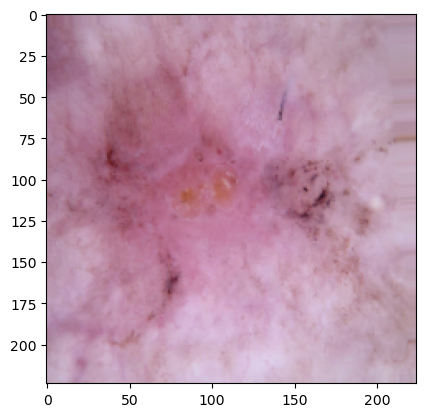

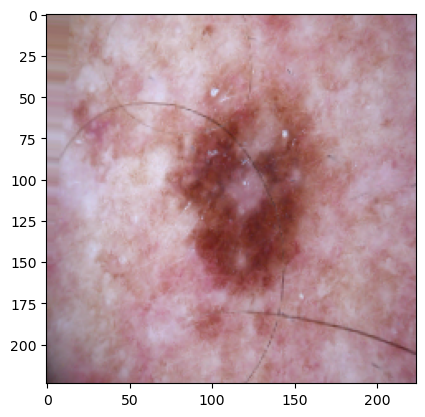

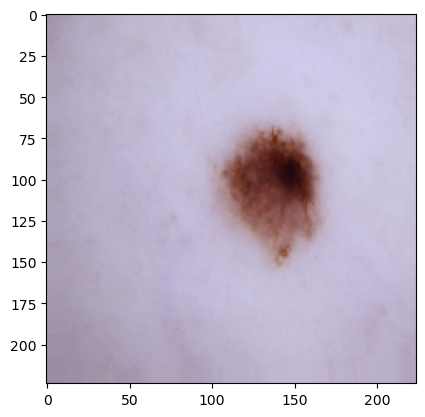

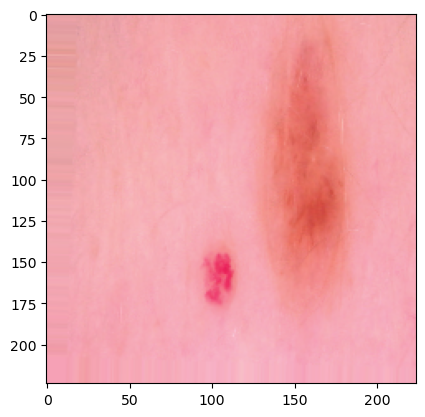

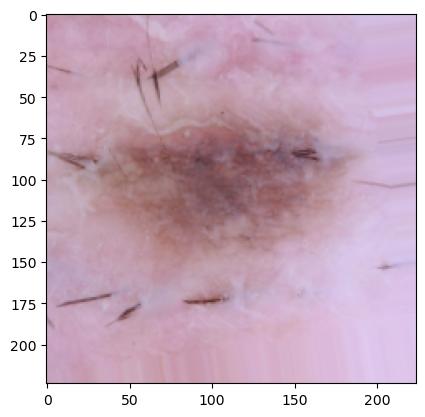

In [13]:
x, y = next(train_data_keras)
#View each image
for i in range (0,5):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [15]:
skin_df = pd.read_csv('/kaggle/input/skin-cancer-dataset/HAM10000_metadata.csv')

In [16]:
class_counts = skin_df['dx'].value_counts()
min_count = min(class_counts)
max_count=max(class_counts)

In [17]:
print(min_count)
print(max_count)

115
6705


In [18]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

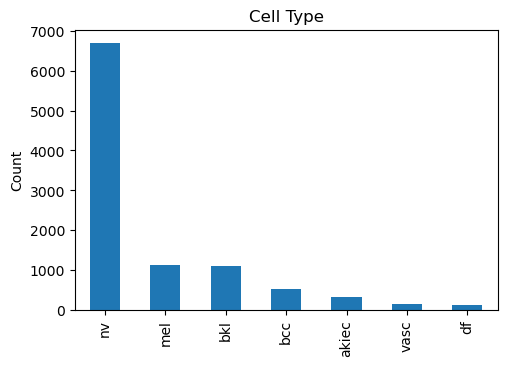

In [19]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

In [20]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [21]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [22]:
n_samples=650
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)


In [23]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [24]:
print(skin_df_balanced['label'].value_counts())

0    650
1    650
2    650
3    650
4    650
5    650
6    650
Name: label, dtype: int64


In [25]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/kaggle/input/skin-cancer-dataset/Skin Cancer/Skin Cancer', '*.jpg'))}

In [26]:
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [47]:
SIZE=32

In [48]:
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [50]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255 
Y=skin_df_balanced['label']  
Y_cat = to_categorical(Y, num_classes=7) 
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.20, random_state=42)

In [51]:

num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(SIZE,SIZE, 3)))
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 15, 15, 256)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 6, 6, 128)        

In [67]:
batch_size = 16 
epochs = 20

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/20
228/228 - 18s - loss: 0.2206 - acc: 0.9217 - val_loss: 0.5939 - val_acc: 0.8473 - 18s/epoch - 80ms/step
Epoch 2/20
228/228 - 18s - loss: 0.2251 - acc: 0.9242 - val_loss: 0.6186 - val_acc: 0.8352 - 18s/epoch - 81ms/step
Epoch 3/20
228/228 - 18s - loss: 0.2423 - acc: 0.9124 - val_loss: 0.6593 - val_acc: 0.8484 - 18s/epoch - 80ms/step
Epoch 4/20
228/228 - 18s - loss: 0.2538 - acc: 0.9115 - val_loss: 0.6214 - val_acc: 0.8374 - 18s/epoch - 81ms/step
Epoch 5/20
228/228 - 18s - loss: 0.2437 - acc: 0.9085 - val_loss: 0.5575 - val_acc: 0.8429 - 18s/epoch - 80ms/step
Epoch 6/20
228/228 - 19s - loss: 0.2492 - acc: 0.9129 - val_loss: 0.6659 - val_acc: 0.8363 - 19s/epoch - 82ms/step
Epoch 7/20
228/228 - 18s - loss: 0.2428 - acc: 0.9132 - val_loss: 0.5953 - val_acc: 0.8407 - 18s/epoch - 80ms/step
Epoch 8/20
228/228 - 19s - loss: 0.2403 - acc: 0.9170 - val_loss: 0.5569 - val_acc: 0.8538 - 19s/epoch - 82ms/step
Epoch 9/20
228/228 - 19s - loss: 0.2185 - acc: 0.9261 - val_loss: 0.5802 - val_a

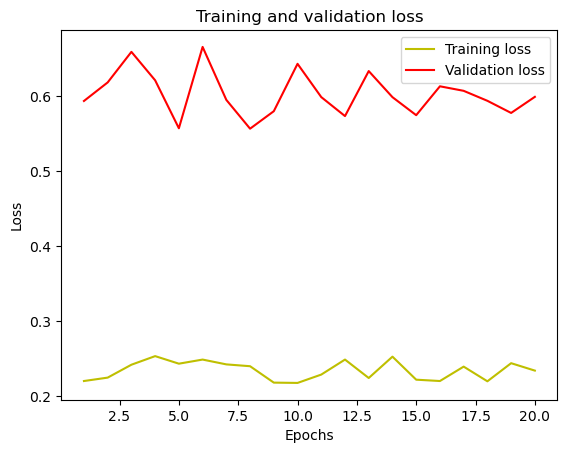

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

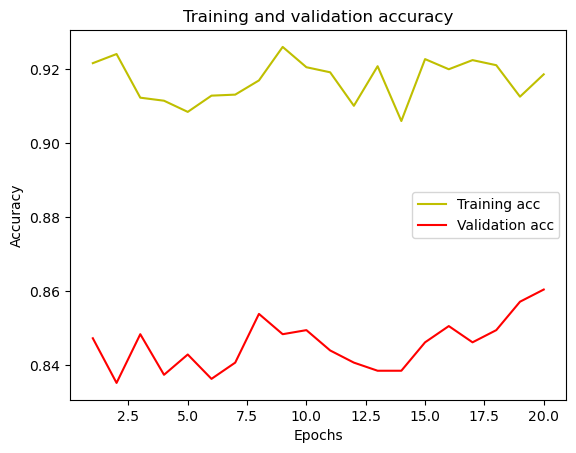

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

29/29 [==============================] - 1s 31ms/step


<AxesSubplot:>

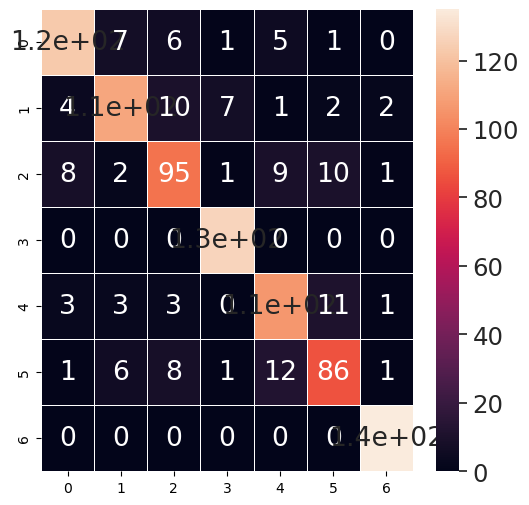

In [71]:
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

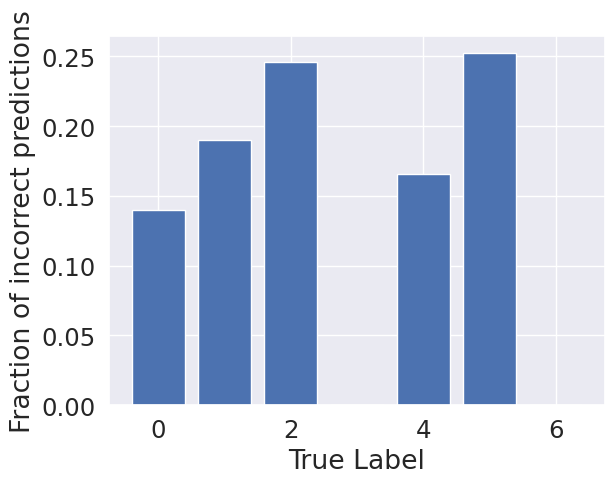

In [72]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
